# SALES ANALYSIS 

# MERGING FILES

STEP 1: IMPORT PANDAS

In [8]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt


step2: list all files in the directory

In [9]:
csv_files = glob.glob('**/*.csv', recursive=True)
print(csv_files)

['combined.csv', 'Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


step 3: Create an empty DataFrame to store the combined data

In [10]:
combined_df = pd.DataFrame()

Loop through each CSV file and append its data to the combined DataFrame

In [11]:
for file in csv_files:
    df = pd.read_csv(file)
    combined_df = pd.concat([combined_df, df], ignore_index=True).drop_duplicates()


Write the combined data to a new CSV file

In [12]:
combined_df.to_csv('combined.csv', index=False)

In [13]:
combined = pd.read_csv('combined.csv')


C:\Users\Beloxxi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


print combined 

In [14]:
print(combined.head())


  Order ID                Product Quantity Ordered Price Each      Order Date  \
0   248151  AA Batteries (4-pack)              4.0       3.84  09/17/19 14:44   
1   248152   USB-C Charging Cable              2.0      11.95  09/29/19 10:19   
2   248153   USB-C Charging Cable              1.0      11.95  09/16/19 17:48   
3   248154       27in FHD Monitor              1.0     149.99  09/27/19 07:52   
4   248155   USB-C Charging Cable              1.0      11.95  09/01/19 19:03   

                        Purchase Address  month  
0    380 North St, Los Angeles, CA 90001    9.0  
1           511 8th St, Austin, TX 73301    9.0  
2  151 Johnson St, Los Angeles, CA 90001    9.0  
3      355 Hickory St, Seattle, WA 98101    9.0  
4          125 5th St, Atlanta, GA 30301    9.0  


# CLEANING DATA

DROP NAN

In [15]:
nan_df = combined[combined.isna().any(axis=1)]
display(nan_df.head())
combined = combined.dropna(how='all')
combined.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
185686,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",NaN
185687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185688,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",NaN
185689,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",NaN
185690,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,248151,AA Batteries (4-pack),4.0,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9.0
1,248152,USB-C Charging Cable,2.0,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9.0
2,248153,USB-C Charging Cable,1.0,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9.0
3,248154,27in FHD Monitor,1.0,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9.0
4,248155,USB-C Charging Cable,1.0,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9.0


In [16]:
combined = pd.read_csv('combined.csv')

C:\Users\Beloxxi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


DROP THE ROWS CONTAINING "OR" IN THE ORDER DATE

MAKE COLUMN CORRECT TYPE

In [17]:
combined = combined[combined['Order Date'].str[0:2]!='Or']

In [18]:
combined['Quantity Ordered'] = pd.to_numeric(combined['Quantity Ordered'])

In [19]:
combined['Price Each'] = pd.to_numeric(combined['Price Each'])

ADD MONTH COLUMN

In [20]:
combined['month'] = combined['Order Date'].str[:2]
combined['month'] = combined['month'].replace('', np.nan)  # Replace empty strings with NaN
combined.dropna(subset=['month'], inplace=True)  # Drop rows with NaN in the 'month' column
combined['month'] = combined['month'].astype(float).astype('Int32')  # Convert to float first, then to nullable integer
combined.to_csv('combined.csv', index=False)
print(combined)


       Order ID                 Product  Quantity Ordered  Price Each  \
0        248151   AA Batteries (4-pack)               4.0        3.84   
1        248152    USB-C Charging Cable               2.0       11.95   
2        248153    USB-C Charging Cable               1.0       11.95   
3        248154        27in FHD Monitor               1.0      149.99   
4        248155    USB-C Charging Cable               1.0       11.95   
...         ...                     ...               ...         ...   
371369   259353  AAA Batteries (4-pack)               3.0        2.99   
371370   259354                  iPhone               1.0      700.00   
371371   259355                  iPhone               1.0      700.00   
371372   259356  34in Ultrawide Monitor               1.0      379.99   
371373   259357    USB-C Charging Cable               1.0       11.95   

            Order Date                         Purchase Address  month  
0       09/17/19 14:44      380 North St, Los Ange

ADD CITY COLUMN

In [21]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

combined['City'] = combined['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City
0,248151,AA Batteries (4-pack),4.0,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,Los Angeles (CA)
1,248152,USB-C Charging Cable,2.0,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,Austin (TX)
2,248153,USB-C Charging Cable,1.0,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,Los Angeles (CA)
3,248154,27in FHD Monitor,1.0,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,Seattle (WA)
4,248155,USB-C Charging Cable,1.0,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,Atlanta (GA)


# DATA EXPLORATION 

Create a sales column

In [22]:
combined['sales'] = combined['Quantity Ordered'].astype('int') * combined['Price Each'].astype('float')

In [23]:
combined.groupby(['month']).sum()

,Quantity Ordered,Price Each,sales
month,,,
1,21786.0,3621849.62,3642826.32
2,26862.0,4373880.76,4400156.16
3,33958.0,5578169.28,5609946.70
4,41072.0,6732437.52,6778435.96
5,37306.0,6266269.22,6301232.46
6,30468.0,5121007.00,5152560.30
7,32108.0,5262450.24,5292922.64
8,26858.0,4453927.80,4482166.74
9,26182.0,4163795.30,4188931.38


plot the graph

range(1, 13)


<function matplotlib.pyplot.show(close=None, block=None)>

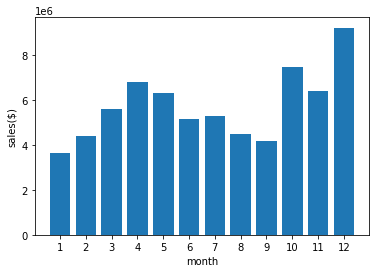

In [24]:
months = range(1,13)
print(months)
plt.bar(months,combined.groupby(['month']).sum()['sales'])
plt.xticks(months)
plt.ylabel('sales($)')
plt.xlabel('month')
plt.show

which city sold the most

In [25]:
combined.groupby(['City']).sum()

,Quantity Ordered,Price Each,month,sales
City,,,,
Atlanta (GA),33168.0,5557217.38,209298,5588398.14
Austin (TX),22274.0,3616680.06,139440,3636088.66
Boston (MA),44988.0,7268796.80,281796,7317255.30
Dallas (TX),33414.0,5500052.76,208894,5530747.92
Los Angeles (CA),66494.0,10834343.40,416040,10896608.56
New York City (NY),55806.0,9265841.08,351114,9323734.28
Portland (ME),5492.0,893504.72,34238,898642.76
Portland (OR),22582.0,3719672.88,141034,3740021.12
San Francisco (CA),100338.0,16408002.76,629898,16509487.10


plot the graph

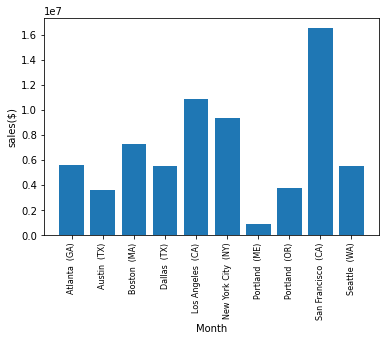

In [26]:
keys = [city for city, df in combined.groupby(['City'])]
plt.bar(keys, combined.groupby(['City']).sum()['sales'])
plt.ylabel('sales($)')
plt.xlabel('Month')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [27]:
combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,sales
0,248151,AA Batteries (4-pack),4.0,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,Los Angeles (CA),15.36
1,248152,USB-C Charging Cable,2.0,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,Austin (TX),23.90
2,248153,USB-C Charging Cable,1.0,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,Los Angeles (CA),11.95
3,248154,27in FHD Monitor,1.0,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,Seattle (WA),149.99
4,248155,USB-C Charging Cable,1.0,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,Atlanta (GA),11.95


what time should we display ads

In [28]:
combined['Order Date'] = pd.to_datetime(combined['Order Date'])  # Convert 'Order Date' column to datetime if it's not already

combined['Hour'] = combined['Order Date'].dt.hour
combined['Minute'] = combined['Order Date'].dt.minute
combined['count'] = 1

combined.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,sales,Hour,Minute,count
0,248151,AA Batteries (4-pack),4.0,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,Los Angeles (CA),15.36,14,44,1
1,248152,USB-C Charging Cable,2.0,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,Austin (TX),23.90,10,19,1
2,248153,USB-C Charging Cable,1.0,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,Los Angeles (CA),11.95,17,48,1
3,248154,27in FHD Monitor,1.0,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,Seattle (WA),149.99,7,52,1
4,248155,USB-C Charging Cable,1.0,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,Atlanta (GA),11.95,19,3,1


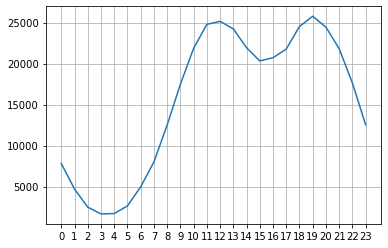

In [29]:
keys = [Hour for Hour, df in combined.groupby(['Hour'])]
plt.plot(keys,combined.groupby(['Hour']).count()['count'])
plt.xticks(keys)
plt.grid()
plt.show()

what products are sold together

In [30]:
df = combined[combined['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID','Grouped']].drop_duplicates()
df2.head()

C:\Users\Beloxxi\AppData\Local\Temp/ipykernel_3360/3337055599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
0,248151,"AA Batteries (4-pack),AA Batteries (4-pack)"
1,248152,"USB-C Charging Cable,USB-C Charging Cable"
2,248153,"USB-C Charging Cable,USB-C Charging Cable"
3,248154,"27in FHD Monitor,27in FHD Monitor"
4,248155,"USB-C Charging Cable,USB-C Charging Cable"


In [31]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('USB-C Charging Cable', 'USB-C Charging Cable') 6421
('Lightning Charging Cable', 'Lightning Charging Cable') 6344
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 6118
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 5985
('Wired Headphones', 'Wired Headphones') 5466
('Apple Airpods Headphones', 'Apple Airpods Headphones') 4634
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 4036
('iPhone', 'Lightning Charging Cable') 2312
('Google Phone', 'USB-C Charging Cable') 2260
('27in FHD Monitor', '27in FHD Monitor') 2242


what product sold the most?

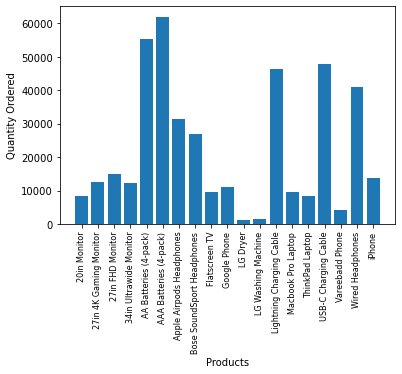

In [32]:
Product_group = combined.groupby('Product')
Quantity_Ordered = Product_group.sum()['Quantity Ordered']
products = [product for product, df in Product_group] 
plt.bar(products, Quantity_Ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size=8)
plt.show()
